In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother

In [3]:
# generate 3 randomwalks of lenght 200
np.random.seed(123)
data = sim_randomwalk(n_series=3, timesteps=200, 
                      process_noise=10, measure_noise=30)

In [4]:
# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(data)
# generate intervals
low, up = smoother.get_intervals('prediction_interval')

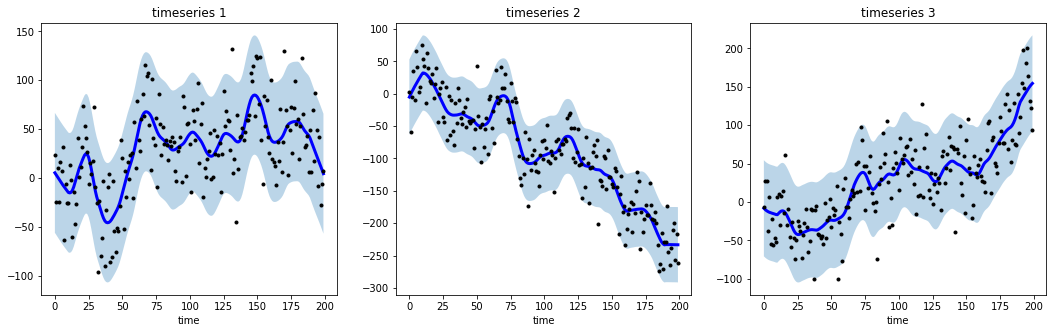

In [5]:
# plot the smoothed timeseries with intervals
plt.figure(figsize=(18,5))

for i in range(3):
    
    plt.subplot(1,3,i+1)
    plt.plot(smoother.smooth_data[i], linewidth=3, color='blue')
    plt.plot(smoother.data[i], '.k')
    plt.title(f"timeseries {i+1}"); plt.xlabel('time')

    plt.fill_between(range(len(smoother.data[i])), low[i], up[i], alpha=0.3)
